# Initial Setup

In [46]:
from bs4 import BeautifulSoup
import os
from datetime import datetime
from natsort import os_sorted
import pandas as pd
from IPython.display import display, HTML
import matplotlib as plt
import matplotlib.dates as mdates

In [3]:
# Create a file list sorted by first to last message

#folder = "c:/Users/DANKINAH/Downloads/Personal/Messages/"
folder = "c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/"
file_list = []
message_set = set()
message_list = []

for filename in os.listdir(folder):
    if filename.endswith('.html'):
       fname = os.path.join(folder, filename)
       file_list.append(fname)

file_list = os_sorted(file_list)
file_list.reverse()
print(file_list)

['c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_18.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_17.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_16.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_15.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_14.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_13.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_12.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_11.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_10.html', 'c:/Users/Daniel/Documents/Archive/Facebook Data/messa

In [4]:
# Grab messages from files and place in a sorted list

for filename in file_list:
	with open(filename, encoding='utf-8') as f:
		soup = BeautifulSoup(f, 'html.parser')
	cur_message_list = []
	messages = soup.find_all(class_='pam _3-95 _2pi0 _2lej uiBoxWhite noborder')
	for message in messages[1:]:
		sender = message.contents[0].string
		content = message.contents[1].contents[0].contents[1].string
		timestamp = datetime.strptime(str(message.contents[2].string), '%d %b %Y, %H:%M')
		message_tuple = (sender,content,timestamp)
		cur_message_list.append(message_tuple)
	cur_message_list.reverse()
	message_list += cur_message_list
	print(filename, len(message_list))

c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_18.html 7506
c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_17.html 17506
c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_16.html 27506
c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_15.html 37506
c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_14.html 47506
c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_13.html 57506
c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_12.html 67506
c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_11.html 77506
c:/Users/Daniel/Documents/Archive/Facebook Data/messages/inbox/FREENEXTIDE_EbQwaw_iLQ/message_10.html 87506
c:/Users/Daniel/Documents/Arc

# Run each of these individually

In [7]:
#Print nicknames for each member

nick = ['set the nickname for', 'set his own nickname', 'set your nickname']

nicknames = dict()

for message_tuple in message_list:
	content = message_tuple[1]
	if not content or 'nickname' not in content:
		continue
	if nick[0] in content:
		nickname = content.split(nick[0])[1].split(' to ')[1][:-1]
		name = content.split(nick[0])[1].split(' to ')[0][1:]
	elif nick[1] in content or nick[2] in content:
		nickname = content.split('nickname')[1].split(' to ')[1][:-1]
		name = message_tuple[0]

	if name not in nicknames:
		nicknames[name] = []
	else:
		nicknames[name].append(nickname)

print('Nicknames of each member')
for name in nicknames.keys():
    print(name + ": " + ', '.join(nicknames[name]) + "\n")

Nicknames of each member
Tristan Turigan: Cuck, cuck, The happy toker, The wise, Tristan Thomas Turigan, irritated, bro, guy who flirts, Goofball #2, loveball #2, nick, tick, Dane, Dane Adams, Dane Adams, Dane Adams, Dane Adams, Dane Adams, Dane Adams, Dane Adams, Dane Adams, Dane Adams, Dane, Dane, the grinch who trie, unreliable untrustworthy piece of shit who's late, the cutest one, Yabba doo, trap bastard, the bastard of new orleans, the bastard of orleans, lazy, Watch ljt, The group's real Italian, The group's real baked Italian, The group's real baked Sentinel, Midnight Toker, mohamed, Chicken Chow Mein, Bad Friend 1, Macaque, Mandrill, Mandrill Tariga, dafty, dafty, Xavier, Nick, Cami, Nick, Zolin, Cerberus, Cerberus, Cerberus, Cerberus, Cerberus, Cerberus, Cerberus, Cerberus, Cerberus, slenda triston, tristan-san, rip, rip, rip, rip, rip, rip, rip, rip, Dip, Dip, Trip, White Knight Mk7 Gundam, jessica, garmanarnar, garmanarnar, garmanarnar, garmanarnar, garmanarnar, garmanarnar

In [ ]:
#Print nicknames for each member grouped by day

nick = ['set the nickname for', 'set his own nickname', 'set your nickname']

nicknames = []

for message_tuple in message_list:
	content = message_tuple[1]
	if not content or 'nickname' not in content:
		continue
	if nick[0] in content:
		nickname = content.split(nick[0])[1].split(' to ')[1][:-1]
		name = content.split(nick[0])[1].split(' to ')[0][1:]
	elif nick[1] in content or nick[2] in content:
		nickname = content.split('nickname')[1].split(' to ')[1][:-1]
		name = message_tuple[0]

	nicknames.append({'name': name, 'nickname': nickname, 'datetime': message_tuple[2]})

df = pd.DataFrame(nicknames)
df = df.groupby(df.datetime.dt.date)['nickname'].apply(', '.join).to_frame()

print('Nicknames grouped by day')
display(HTML(df.to_html()))

In [8]:
#Print amount each member has set a nickname

nick = ['set the nickname for', 'set his own nickname', 'set your nickname']

members = dict()

for message_tuple in message_list:
	content = message_tuple[1]
	if not content:
		continue
	if any([x in content for x in nick]):
		name = message_tuple[0]
		if name not in members:
			members[name] = 0
		else:
			members[name] += 1

print('Amount each member has set a nickname')
display(members)

Amount each member has set a nickname


{'Tristan Turigan': 30,
 'Daniel Kinahan': 152,
 'Alex Staszak': 93,
 'Nick Cornell': 59,
 'Robby Royston': 196,
 'Erik Porteous': 32,
 'Ben Wood': 179,
 'Caelan Rae-Oulette': 82,
 'Brye Loelke': 6,
 'Theo Mohamed': 8,
 'Francois Jolicoeur': 2}

In [9]:
#Print amount each member has said a certain word

word = 'friend'

members = dict()

for message_tuple in message_list:
	content = message_tuple[1]
	if not content:
		continue
	if word in content:
		name = message_tuple[0]
		if name not in members:
			members[name] = 0
		else:
			members[name] += 1
print('Word frequency of: ' + word)
display(members)

Word frequency of: friend


{'Alex Staszak': 84,
 'Daniel Kinahan': 89,
 'Robby Royston': 141,
 'Tristan Turigan': 37,
 'Nick Cornell': 60,
 'Caelan Rae-Oulette': 103,
 'Ben Wood': 104,
 'Erik Porteous': 25,
 'Brye Loelke': 0,
 'Theo Mohamed': 8}

In [94]:
#Print amount each word has been said

skip = ('the group.', 'the group photo.', 'set the emoji to', 'Click for video:', 'cleared the nickname for', 'cleared your nickname', 'points playing basketball.', 'Click for audio')
prepositions = ('i', 'I', 'the', 'to', 'you', 'it', 'a', 'is', 'and', 'u', 'my', "I'm", 'for', 'that', 'not', 'are', 'we', 'me', 'just', 'so', 'No', 'no', 'of', "don't", 'in', 'im', 'on')

words = dict()

for message_tuple in message_list:
	content = message_tuple[1]
	if not content:
		continue
	if any(x in content for x in skip):
		continue
	for word in content.split():
		if word not in prepositions:
			if word not in words:
				words[word] = 0
			words[word] += 1

print('Word frequencies')
display(dict(sorted(words.items(), key=lambda item: item[1])))

Word frequencies


{'*New': 1,
 'Improved*': 1,
 'Itl': 1,
 'screenshotting': 1,
 'Novi': 1,
 'Tasha': 1,
 'chuhaniuk': 1,
 'composure': 1,
 'outraging': 1,
 '"That': 1,
 'seen"': 1,
 'Scarf': 1,
 'mirror,': 1,
 'dontcha?"': 1,
 'arg': 1,
 'binder?': 1,
 'skippper!!!': 1,
 'novi': 1,
 'gulash': 1,
 'recipe"': 1,
 '"norm': 1,
 'north"': 1,
 'introduces': 1,
 'daf': 1,
 'Kekeked': 1,
 'macmurry': 1,
 'quota': 1,
 'Relate': 1,
 'Jus': 1,
 'HCG!': 1,
 '------------>': 1,
 'http://': 1,
 'theultimatehcgdrops': 1,
 'com/buy-best-hcg-drops/': 1,
 '{type': 1,
 'spaces}': 1,
 'witnessing': 1,
 'Discussion:': 1,
 'cringiest': 1,
 'redemption:': 1,
 'Redemption': 1,
 'likea': 1,
 'Calzone': 1,
 'Tiffanies': 1,
 'careful;)': 1,
 'Tiffanys': 1,
 'Nicl': 1,
 'fiend!': 1,
 'AHHhHhHhHhHhHhHhHhHhHhHhHh': 1,
 'dog,': 1,
 'Ronald': 1,
 'cuckdonald': 1,
 'kandy': 1,
 'Ad*': 1,
 'Ben=grumpy': 1,
 'exfoliating': 1,
 'moisturizing': 1,
 'pimples': 1,
 'aie': 1,
 'crie': 1,
 'livinf': 1,
 'tickle': 1,
 'fancy?': 1,
 'ethically'

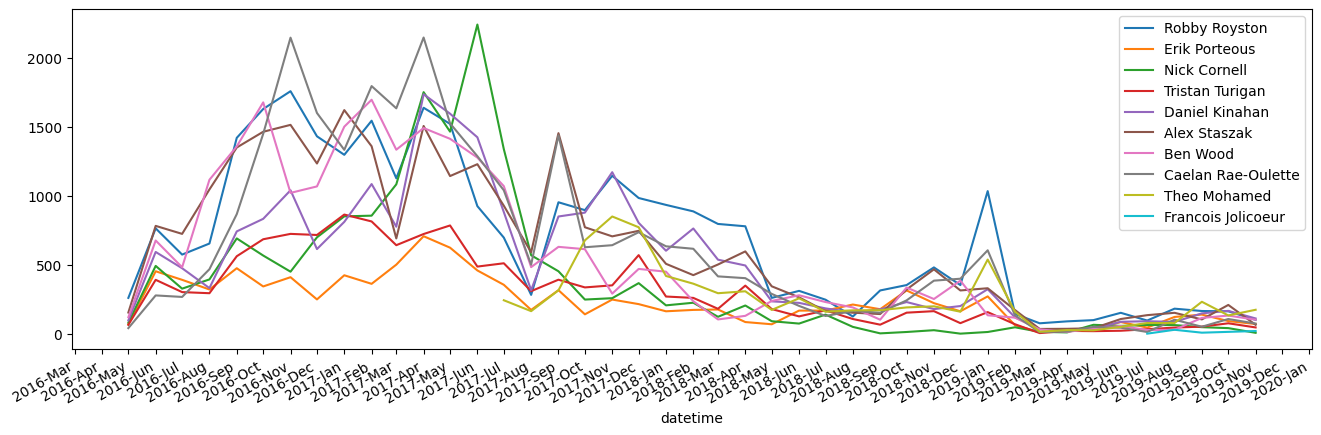

In [87]:
#Print message frequency over time per person

plt.rcParams["figure.figsize"] = (16,5)

df = pd.DataFrame(message_list, columns = ['sender', 'content', 'datetime'])
# df.groupby([df.datetime.dt.year, df.datetime.dt.month])['sender'].count().plot()

members = ['Robby Royston', 'Erik Porteous', 'Nick Cornell', 'Tristan Turigan', 'Daniel Kinahan', 'Alex Staszak', 'Ben Wood', 'Caelan Rae-Oulette', 'Theo Mohamed', 'Francois Jolicoeur']
for member in members:
    temp=df[df['sender']==member]
    ax = temp.groupby(df.datetime.dt.to_period('M'))['sender'].count().plot(x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.legend(members)